# 🤖 Notebook 02: Modelltraining zur Lötstellenklassifikation
In diesem Notebook trainieren wir ein Machine Learning-Modell (Decision Tree), um zwischen fehlerfreien (`OK`) und fehlerhaften (`NOK`) THT-Lötstellen zu unterscheiden. Der Datensatz wurde zuvor simuliert und enthält Merkmale wie Volumen, Höhe, Fläche, Rundheit und Abstand zum Lötpad.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# CSV-Datei laden
df = pd.read_csv("01_generated_aoi_data_80_20_ratio_rounded.csv")
df.head(10)

,convex_volume,max_height,area,roundness,pad_distance,label
0,1.9264,1.4259,3.8846,0.8988,0.2280,OK
1,2.6191,1.5801,4.2819,0.9030,0.1525,OK
2,2.9427,1.2019,3.3805,0.8941,0.2546,OK
3,2.6678,1.7501,4.1928,0.8484,0.1524,OK
4,4.0634,2.0017,6.3782,0.5019,0.0802,NOK
5,2.3926,1.2957,3.7398,0.8317,0.1974,OK
6,2.2502,1.4045,3.6152,0.9566,0.2624,OK
7,2.6682,1.4022,3.5797,0.8346,0.1802,OK
8,3.0173,1.1952,3.8982,0.8690,0.2108,OK
9,2.4635,1.3904,3.4636,0.8393,0.1685,OK


In [5]:
# Features & Zielvariable definieren
X = df.drop('label', axis=1)
y = df['label']

In [6]:
# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Decision Tree trainieren
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
# Vorhersage & Genauigkeit messen
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Modellgenauigkeit: {accuracy:.4f}")

Modellgenauigkeit: 1.0000


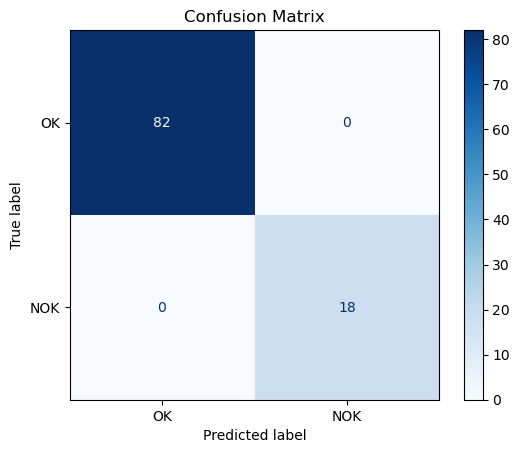

In [9]:
# Confusion Matrix anzeigen
cm = confusion_matrix(y_test, y_pred, labels=['OK', 'NOK'])
ConfusionMatrixDisplay(cm, display_labels=['OK', 'NOK']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

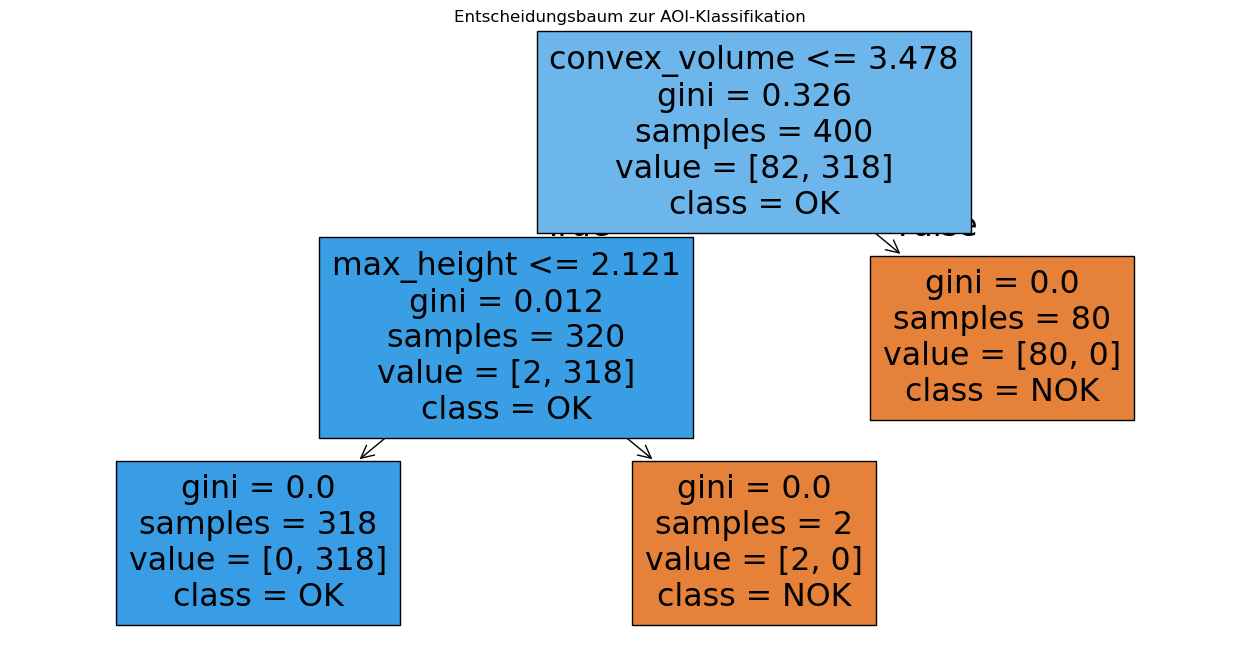

In [10]:
# Entscheidungsbaum visualisieren
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Entscheidungsbaum zur AOI-Klassifikation")
plt.show()

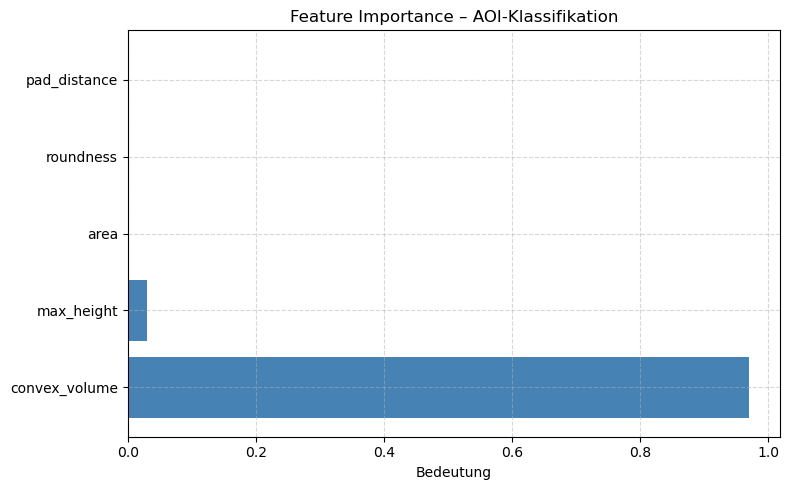

In [11]:
import matplotlib.pyplot as plt

# Feature Importance aus dem trainierten Decision Tree
importances = clf.feature_importances_
features = X.columns

# Plot anzeigen
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color="steelblue")
plt.xlabel("Bedeutung")
plt.title("Feature Importance – AOI-Klassifikation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
